In [1]:
#DSC320 Week 1
#Angela Hansen
#6/12/24

# Part I:  Mathematical and Python Functions
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1a. create a function that computes RMSE between two arrays of same length
def RMSE(y1, y2):
  # find the lengths
  n1 = len(y1)
  n2 = len(y2)
  # check if the length of two arrays is same
  if n1 != n2:
    raise 'len(y1) != len(y2)'
  n = n1
  # (y1-y2) will generate a new array with component y1[i] - y2[i]
  # np.pow(y1 - y2, 2) will find (y1-[i] - y2[i])^2
  # np.sum will take sum of all those squares
  # np.sqrt will find square root of the sum of squares divided by n
  print('RMSE = ', np.sqrt((1/n)*np.sum(np.power(y1 - y2, 2))))

# 1b. apply RMSE function
data = open("C:\\Users\\angel\\Desktop\\College Coursework\\Bellevue University\\2024 Summer\\DSC320\\Week 1\\housing_data.csv")
df = pd.read_csv(data)
rmse = RMSE(df.sale_price, df.sale_price_pred)

# 2a. create a function that computes MAE between two arrays of same length 
def MAE(y1, y2):
  # find the lengths
  n1 = len(y1)
  n2 = len(y2)
  # check if the length of two arrays is same
  if n1 != n2:
    raise 'len(y1) != len(y2)'
  n = n1
  # (y1 - y2) will generate a new array with componet y1[i] - y2[i]
  # np.abs(y1 - y2) will generate a new array with components |y1[i| - y2[i]
  # np.sum(np.abs(y1 - y2)) will take the sum of absolute difference
  # dividing the value by n will genarate the mean absolute error
  print('MAE = ', np.sum(np.abs(y1 - y2))/n)

# 2b. apply MAE function
data = open("C:\\Users\\angel\\Desktop\\College Coursework\\Bellevue University\\2024 Summer\\DSC320\\Week 1\\housing_data.csv")
df = pd.read_csv(data)
mae = MAE(df.sale_price, df.sale_price_pred)


RMSE =  55064.0688338987
MAE =  37438.68916270548


In [4]:
# 3a. compute the accuracy of two arrays of same length
def ACCURACY(y1, y2):
  # find the lengths
  n1 = len(y1)
  n2 = len(y2)
  # check if the length of two arrays is same
  if n1 != n2:
    raise 'len(y1) != len(y2)'
  n = n1
  # (y1 == y2) will generate an array of [True/False] where it's True if y1[i] = y2[i]; False otherwise
  # np.sum(y1 == y2) will return the count of True
  # division by `n` will return the percent
  print('ACCURACY = ', np.sum(y1 == y2)/n)

# 3b. apply ACCURACY function
data = open("C:\\Users\\angel\\Desktop\\College Coursework\\Bellevue University\\2024 Summer\\DSC320\\Week 1\\mushroom_data.csv")
df = pd.read_csv(data)
accuracy = ACCURACY(df.actual, df.predicted)

ACCURACY =  0.8471196454948301


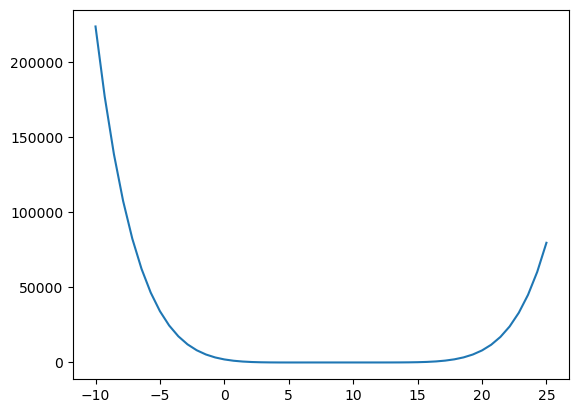

In [3]:
def ERROR(p):
  # compute the error function
  return 0.005*np.power(p, 6) - 0.27*np.power(p, 5) + 5.998*np.power(p, 4) - 69.919*np.power(p, 3) + 449.17*np.power(p, 2) - 1499.7*np.power(p, 1) + 2028

# 4a. plot the error
xs = np.linspace(-10, 25)
ys = ERROR(xs)
plt.plot(xs, ys)

In [4]:
# 4b. From the graph, we can see that the minimum value of the function is where p is between 1 & 17.5 (I'll guess 3), where p is a parameter of the model.

# 4c. Minimum error
actual_min = np.min(ys)
val_at_3 = ERROR(3)
print('Actual Minimum = ', actual_min)
print('Predicted Minimum at p=3 is ', val_at_3)

Actual Minimum =  2.0
Predicted Minimum at p=3 is  107.48999999999978


My line:
RMSE =  4.212047587343807
My line:
RMSE =  4.212047587343807
Best-fit line:
RMSE =  4.144895442072008
Hwy_mpg of car that weighs 3200 lbs using best-fit line is:
intercept: 57.70517422574473
slope: [-0.01054716]
predicted response:
[23.95427129]


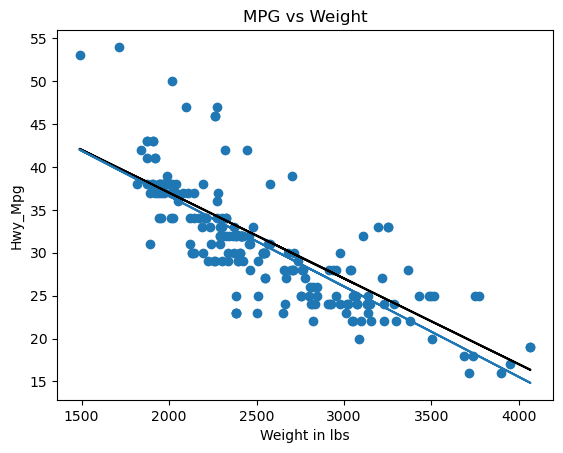

In [5]:
#PartII

#1.  Make a scatterplot
#read data from car_data.csv data set
data = open("C:\\Users\\angel\\Desktop\\College Coursework\\Bellevue University\\2024 Summer\\DSC320\\Week 1\\car_data.csv")
df = pd.read_csv(data)

#create scatterplot of mpg (y-axis) vs weight (x-axis)
plt.scatter(x=df["weight"], y=df["hwy_mpg"])
plt.title('MPG vs Weight')
plt.xlabel('Weight in lbs')
plt.ylabel('Hwy_Mpg')

# 2.  Based on the plot, hwy_mpg decreases as weight increases.

# 3. I would expect slope to be negative, since hwy_mpg decreases as weight increases (change in y/change in x).

# 4. The meaning of slope being -0.05: Slope is defined as change in y/change in x.  It would mean that for every increase of 1 in x (weight), y (hwy_mpg) would decrease by -0.05.

# 5. Write code to add a line.
plt.plot(df["weight"], -0.01*df["weight"]+57, linestyle='solid', color='black')
print('My line:')
rmse = RMSE(df.hwy_mpg, -0.01*df["weight"]+57)

#6.  Write code to add best-fit line.
#add a linear regression line
x=df["weight"].values[:,np.newaxis]
y=df["hwy_mpg"].values
model = LinearRegression()
model.fit(x,y)
plt.plot(x, model.predict(x))

#7.  Find RMSE of #5 & #6 and compare.
print('My line:')
rmse = RMSE(df.hwy_mpg, -0.01*df["weight"]+57)
#4.212047587343807
print('Best-fit line:')
rmse = RMSE(y, model.predict(x))
#4.144895442072008
#The best-fit line using the regression model has a smaller RMSE (root mean square error), which is what I would expect.

#8.  Find hwy_mpg of car that weights 3200 lbs with regression model
print('Hwy_mpg of car that weighs 3200 lbs using best-fit line is:')
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = model.intercept_ + model.coef_ * 3200
print(f"predicted response:\n{y_pred}")